In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import time


In [8]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_b_change_g_0.nc")
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_b_change_g_0_long.nc")
u = ocean_data.u+ocean_data.U
v = ocean_data.v+ocean_data.V
b = ocean_data.b+ocean_data.B
w = ocean_data.w

In [9]:
ocean_data.time*10**(-9)

<xarray.DataArray 'time' (time: 51)>
array([     0,   6092,  12185,  18278,  24370,  30463,  36556,  42649,
        48741,  54834,  60927,  67019,  73112,  79205,  85298,  91390,
        97483, 103576, 109668, 115761, 121854, 127947, 134039, 140132,
       146225, 152318, 158410, 164503, 170596, 176688, 182781, 188874,
       194967, 201059, 207152, 213245, 219337, 225430, 231523, 237616,
       243708, 249801, 255894, 261987, 268079, 274172, 280265, 286357,
       292450, 298543, 304636], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 3 days 12:37:16.099276984

In [10]:
f = 2*(2*np.pi/(24*60*60))*np.sin(np.radians(45))
(ocean_data.time*10**(-8))*(f/2*np.pi)
# ocean_data.time

<xarray.DataArray 'time' (time: 51)>
array([  0,   9,  19,  29,  39,  49,  59,  68,  78,  88,  98, 108, 118,
       127, 137, 147, 157, 167, 177, 187, 196, 206, 216, 226, 236, 246,
       255, 265, 275, 285, 295, 305, 314, 324, 334, 344, 354, 364, 374,
       383, 393, 403, 413, 423, 433, 442, 452, 462, 472, 482, 492],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 3 days 12:37:16.099276984

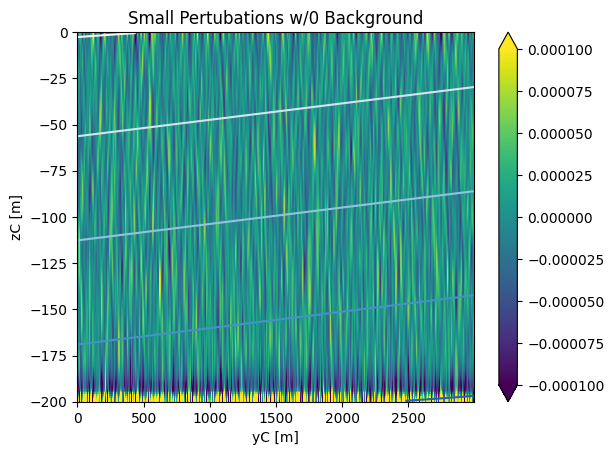

In [17]:
# vmin and vmax control colorbar range
# for i in range(len(ocean_data.time)):
# show timw -20, -25, -30, -35
q = -20
k = -4# order of magnitude
m = 1 # range number
v[q].plot(vmin=-m*10**(k),vmax=m*10**(k))
xr.plot.contour(b[q,:,:,0],levels=10)
plt.title("Small Pertubations w/0 Background")
plt.show()


b[1].plot()

In [12]:
t2 = 6
print(b[t2,-1,511,0])
print(b[0,-1,511,0])


<xarray.DataArray ()>
array(-0.00086017)
Coordinates:
    zC       float64 -0.5
    xC       float64 0.5
    yC       float64 1.499e+03
    time     timedelta64[ns] 10:09:16.331913238
<xarray.DataArray ()>
array(-0.00098039)
Coordinates:
    zC       float64 -0.5
    xC       float64 0.5
    yC       float64 1.499e+03
    time     timedelta64[ns] 00:00:00


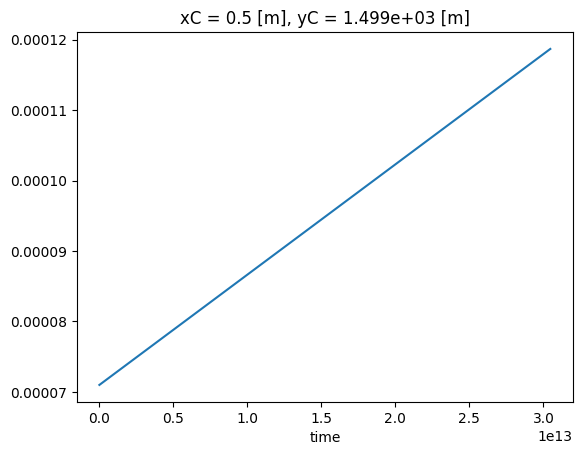

In [23]:
time = -1
((b[:,time,511,0]-b[:,time-1,511,0])/(1)).plot()

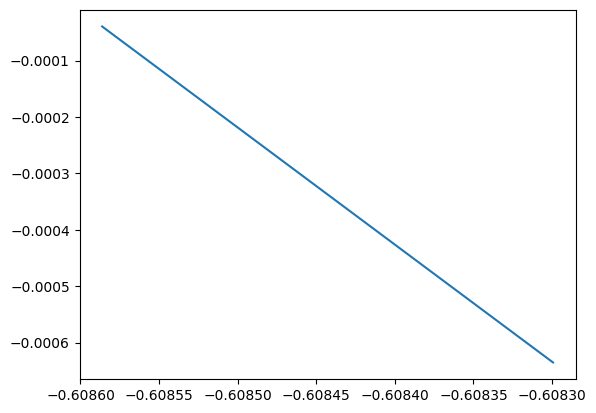

In [24]:
plt.plot(u[:,100,511,0],v[:,100,511,0])

In [ ]:
59000/((2*np.pi)/(10**(-4)))

0.9390141642421826

In [ ]:
81.7*10**(-4)

0.00817